# eyeGrowth

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## read the DATA

In [2]:
file_path = "data/Final_data_18.8.20_Clear.csv"

#replace ' ' with na
df_full = pd.read_csv(file_path, na_values=' ', index_col=0)

## Displaying  Data 

In [3]:
print('Full Shape:', df_full.shape)

Full Shape: (100, 131)


In [4]:
pd.set_option("display.max_rows",None)
df_full.head()

,ID_num,Name,Age,Sex,????,HTN,DM,Hypercho,BCC,DNS,...,SCLERA_Radiation rate_cGy,SCLERA_Radiation dose_cGy,OP_DISC_Radiation_rate_cGy,OP_DISC_Radiation_dose_cGy,LENS_Radiation rate_cGy,LENS_Radiation dose_cGy,MACULA_Radiation rate_cGy,"MACULA-Radiation ose, cGy/h",APEX_Radiation_rate_cGy,APEX_Radiation dose_cGy
1,9757311,???? ???,87,2,2,1,1,1,0,0,...,531.0,804.0,15.0,23.0,38.0,58.0,14.0,21.0,52.0,80.0
2,310332994,???? ????,72,2,2,1,0,0,0,0,...,469.0,340.0,73.0,53.0,13.0,10.0,39.0,28.0,110.0,80.0
3,305847832,????? ????,59,2,2,1,0,1,0,1,...,818.0,753.0,162.0,149.0,38.0,35.0,77.0,71.0,90.0,83.0
4,8520397,????? ?????,71,2,2,0,0,1,0,0,...,597.0,346.0,65.0,37.0,15.0,9.0,109.0,63.0,168.0,80.0
5,9763160,??????? ??,76,1,1,0,1,1,0,0,...,273.0,247.0,32.0,29.0,21.0,19.0,37.0,34.0,94.0,85.0


In [5]:
#sum the how many columns are not full 
#print (df_full.isna().sum())

print ("=====****======  Missing values  =" )
        
for col in df_full:
    if df_full[col].isna().sum() > 0:
        print (col)
        

=====****======  Missing values  =
VA_FIRST_logmar
VA_ONE_YEAR_LOGMAR
VA_Three_years_logmar
IOP_ONE_year
IOP_THREE_years
PVD_FU
Lengh_PVD_NEW
VH_FU
Lengh_VH_NEW
CME_FU
Lengh_CME_NEW
ERM_FU
Lengh_ERM_NEW
DIPLOPIA_FU
Lengh_DIPLOPIA_NEW
RD_FU
Lengh_RD_NEW
PED_FU
Lengh_PED_NEW
SRF_FU
Lengh_SRF_NEW
Subretinal_fluid
Isotope


In [6]:
# drop irrlevant columns or not full columns
drop_columns = ['ID_num','Name','first_visit','last_visit','operation_date','IOP_ONE_year','IOP_THREE_years']

# axis 1 refers to the columns
df_full.drop(drop_columns, axis=1, errors='ignore' ,inplace=True)

In [7]:
df_full.shape

(100, 124)

# Prepare features & labels

# set label

In [8]:
# Labels are the values we want to predict

# if VA_Three_years_logmar exist
#    Label = VA_Three_years_logmar
# Else
#    Label = VA_ONE_YEAR_LOGMAR

df_full['Label']= df_full['VA_Three_years_logmar']

#if VA_Three_years_logmar is NULL:
# 1. Fill the values of VA_ONE_YEAR_LOGMAR with mean()
# 2. Copy from VA_ONE_YEAR_LOGMAR to Label
df_full['VA_ONE_YEAR_LOGMAR'].fillna(df_full['VA_ONE_YEAR_LOGMAR'].mean(), inplace=True)
df_full['Label'].fillna(df_full['VA_ONE_YEAR_LOGMAR'], inplace=True)


### Label_calc is the final label ########

# if (Label >= 0.8)
#    Label_calc = 2
# else if Label < 0.5)
#    Label_calc = 0
# else
#    Label_calc = 1
    
df_full['Label_calc'] = np.where(df_full['Label']>=0.8, 2, (np.where(df_full['Label']<0.5,0,1)))

#### For debug #####
#print (df_full['Label'] , df_full['Label_calc'])

# set features 

## remove labels columns from features

In [9]:
# Remove the from the  features the labels columns  
# axis 1 refers to the columns
features= df_full.drop(['VA_ONE_YEAR_LOGMAR', 'VA_Three_years_logmar', 'Label', 'Label_calc'], errors='ignore', axis = 1)

## remove columns that missing many values

In [10]:
features_missing_many_values =[]


for col in features:
    if features[col].isna().sum() > 10:
        features_missing_many_values.append(col)

########  Debug - Before removing ###############        
print ("===== Before removing -  Columns with missing values ====== " )
for x in range(len(features_missing_many_values)): 
    print (features_missing_many_values[x])

# reomove missing vlaues
features= features.drop(features_missing_many_values, axis = 1) 

########  Debug - After removing ###############
print ("===== After removing - Columns with missing values ====== " )
for col in features:
    if features[col].isna().sum() > 10:
        print (col)

===== Before removing -  Columns with missing values ====== 
PVD_FU
Lengh_PVD_NEW
RD_FU
Lengh_RD_NEW
===== After removing - Columns with missing values ====== 


## Fill features columns that aren't full  

In [11]:

########  Debug - Before filling ###############   
print ("***** Before filling - column with : na *****")        
for col in features:
    if features[col].isna().sum() > 0:
        print (col)

########  Filling missed value ############### 
for col in features:
    if features[col].isna().sum() > 0:
        # fill na with mean
        features[col].fillna((features[col].mean()), inplace=True)


########  Debug - After filling ###############
print ("***** After filling - column with : na *****")        
for col in features:
    if features[col].isna().sum() > 0:
            print (col)        

***** Before filling - column with : na *****
VA_FIRST_logmar
VH_FU
Lengh_VH_NEW
CME_FU
Lengh_CME_NEW
ERM_FU
Lengh_ERM_NEW
DIPLOPIA_FU
Lengh_DIPLOPIA_NEW
PED_FU
Lengh_PED_NEW
SRF_FU
Lengh_SRF_NEW
Subretinal_fluid
Isotope
***** After filling - column with : na *****


In [12]:
#change T_critieria vlaues a->0, b->1, c->2, d->3

features['T_critieria'] = features['T_critieria'].map({'a':0, 'b':1, 'c':2, 'd':3}) 
#print (features['T_critieria'])

In [13]:
# TBD - drop not int values
#features=features.drop(['Lengh_PVD_NEW','VH_FU','Lengh_CME_NEW','ERM_FU','Lengh_ERM_NEW'], errors='ignore', axis = 1)
#features=features.drop(['VH_FU','Lengh_CME_NEW','ERM_FU','Lengh_ERM_NEW'], errors='ignore', axis = 1)
#features=features.drop(['DIPLOPIA_FU','Lengh_DIPLOPIA_NEW','RD_FU','Lengh_RD_NEW'], errors='ignore', axis = 1)
#features=features.drop(['T_critieria'], errors='ignore', axis = 1)

print (features.dtypes)
print ("*************")
print (features.isna().sum().sum())
print ("*************")
print (features.shape)

Age                                int64
Sex                                int64
????                               int64
HTN                                int64
DM                                 int64
Hypercho                           int64
BCC                                int64
DNS                                int64
skin_malig_melanoma                int64
TOTAL_FOLLOW_MONTH                 int64
future_visit                       int64
Eye                                int64
Decreased_visual_acuity            int64
Flashes_floaters                   int64
diziness                           int64
methamorphopsia                    int64
Pain                               int64
Diplopia                           int64
Asymptomatic                       int64
VA_FIRST_logmar                  float64
IOP_FIRST                          int64
Iris_color                         int64
Iris_finding                       int64
Overhang_of_optic_nerve            int64
Optic_disc_swell

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
print(scaler.data_max_[1])
scaler.transform(features)
print(scaler.data_max_[1])


2.0
2.0


In [15]:
# set the label
labels = df_full['Label_calc']

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (75, 118)
Training Labels Shape: (75,)
Testing Features Shape: (25, 118)
Testing Labels Shape: (25,)


## Train model

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 10000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

# Make a prediction
prediction=rf.predict(test_features)

# Confusion matrix

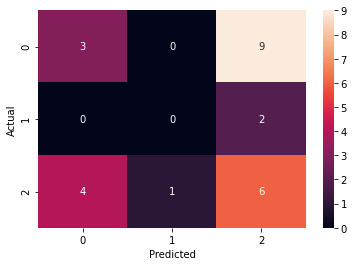

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(test_labels, prediction, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()



In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, prediction)

0.36

# Tree display

In [21]:
'''

# Extract single tree
estimator = rf.estimators_[10]

from sklearn.tree import export_graphviz

cols = list(features.columns.values)

#class_names = list(set(labels))
class_names = list(set(features.iloc[:,-1]))


#print (cols)
# Export as dot file
export_graphviz(estimator, out_file='data/tree.dot', 
                feature_names = cols,
                class_names = cols,#True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
import pydot

(graph,) = pydot.graph_from_dot_file('data/tree.dot')
graph.write_png('data/tree.png')

from IPython.display import Image, display

display(Image('data/tree.png'))

'''

"\n\n# Extract single tree\nestimator = rf.estimators_[10]\n\nfrom sklearn.tree import export_graphviz\n\ncols = list(features.columns.values)\n\n#class_names = list(set(labels))\nclass_names = list(set(features.iloc[:,-1]))\n\n\n#print (cols)\n# Export as dot file\nexport_graphviz(estimator, out_file='data/tree.dot', \n                feature_names = cols,\n                class_names = cols,#True,\n                rounded = True, proportion = False, \n                precision = 2, filled = True)\n\n# Convert to png\nimport pydot\n\n(graph,) = pydot.graph_from_dot_file('data/tree.dot')\ngraph.write_png('data/tree.png')\n\nfrom IPython.display import Image, display\n\ndisplay(Image('data/tree.png'))\n\n"

# Feature importances

In [24]:
cols = list(features.columns.values)
features = cols
importances = rf.feature_importances_

# Sort feature importances in in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
for i in indices:
#    print (i, "=" ,cols[i], " ", importances[i])
    print ('{:<30}{:<40}'.format(cols[i],importances[i]))
        

SCLERA_Radiation rate_cGy     0.03754886842132142                     
OP_DISC_Radiation_dose_cGy    0.03245868008935799                     
OP_DISC_Radiation_rate_cGy    0.027188305748652126                    
MACULA_Radiation rate_cGy     0.0264523866848999                      
SCLERA_Radiation dose_cGy     0.025368858259234843                    
IOP_FIRST                     0.024909645487611473                    
APEX_Radiation_rate_cGy       0.024651510852283016                    
MACULA-Radiation ose, cGy/h   0.024483956512282152                    
Lengh_CME_NEW                 0.023392716757190304                    
%_of_retinal_surface          0.02314431392219463                     
Radiation_duration_H          0.022513358710043032                    
Proximity_to_foveola          0.022443922586263484                    
Age                           0.02205981146824473                     
Aprox_volume                  0.021812082912348603                    
Proxim

plt.figure(figsize=(20,30))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.plot()
plt.show()




# Test new sample against prediction

In [25]:
# Xnew = [[63, 2]]
# make a prediction
#ynew = rf.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))